In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_excel('educacion_11.xlsx')

In [3]:
df.head(10)

,Entidad federativa,Nivel educativo,2000/2001,2005/2006,2010/2011,2015/2016,2020/2021,2021/2022,2022/2023,2023/2024
0,Estados Unidos Mexicanos,Primaria,1.9,1.3,0.7,0.7,0.5,0.2,0.1,0.1
1,NaN,Secundaria,8.3,7.7,5.6,4.4,2.9,3.9,3.2,2.9
2,NaN,Media superior,17.5,16.5,14.9,15.5,11.6,10.2,11.2,10.8
3,NaN,Superior,8.2,7.6,7.1,7.0,8.8,8.1,7.2,5.7
4,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.7,0.4,0.0,0.0
5,NaN,Secundaria,8.0,8.2,4.5,5.9,3.0,4.6,4.7,4.5
6,NaN,Media superior,16.6,15.6,15.2,14.2,13.5,8.3,10.7,10.3
7,NaN,Superior,3.8,6.1,7.2,6.3,4.8,10.3,8.4,8.8
8,Baja California,Primaria,1.3,1.2,0.2,-0.2,-0.5,-0.4,-1.4,-0.9
9,NaN,Secundaria,9.9,7.0,5.6,4.6,1.4,2.9,2.7,2.2


In [4]:
# Propagar entidad federativa hacia abajo
df['Entidad federativa'] = df['Entidad federativa'].fillna(method='ffill')
df_melted = df.melt(id_vars=['Entidad federativa', 'Nivel educativo'], 
                    var_name='Año', 
                    value_name='Tasa_Abandono')
grouped = df_melted.groupby(['Entidad federativa', 'Nivel educativo', 'Año'])['Tasa_Abandono'].mean().reset_index()


C:\Users\bruno\AppData\Local\Temp\ipykernel_15992\489749787.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Entidad federativa'] = df['Entidad federativa'].fillna(method='ffill')


In [5]:
df.head()

,Entidad federativa,Nivel educativo,2000/2001,2005/2006,2010/2011,2015/2016,2020/2021,2021/2022,2022/2023,2023/2024
0,Estados Unidos Mexicanos,Primaria,1.9,1.3,0.7,0.7,0.5,0.2,0.1,0.1
1,Estados Unidos Mexicanos,Secundaria,8.3,7.7,5.6,4.4,2.9,3.9,3.2,2.9
2,Estados Unidos Mexicanos,Media superior,17.5,16.5,14.9,15.5,11.6,10.2,11.2,10.8
3,Estados Unidos Mexicanos,Superior,8.2,7.6,7.1,7.0,8.8,8.1,7.2,5.7
4,Aguascalientes,Primaria,1.5,1.6,-0.2,0.2,0.7,0.4,0.0,0.0


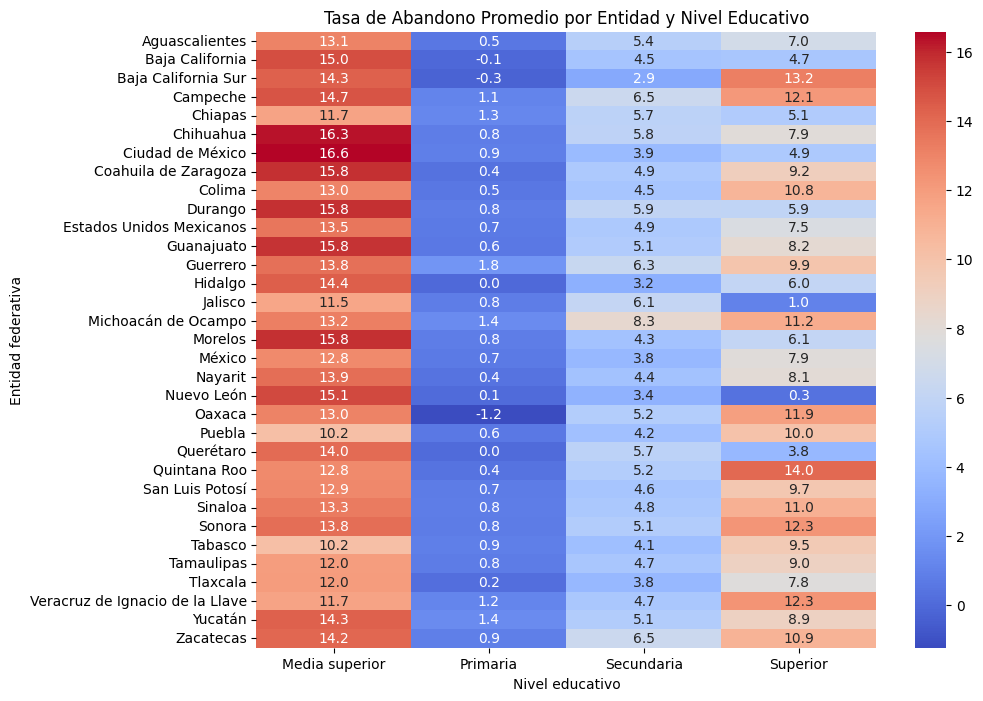

In [6]:
pivot_df = grouped.groupby(['Entidad federativa', 'Nivel educativo'])['Tasa_Abandono'].mean().unstack()
# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Tasa de Abandono Promedio por Entidad y Nivel Educativo')
plt.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_15992\1516952011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Entidad federativa', y='Tasa_Abandono', palette='viridis')


Text(0.5, 1.0, 'Top 10 Entidades con Mayor Tasa de Abandono Escolar Promedio)')

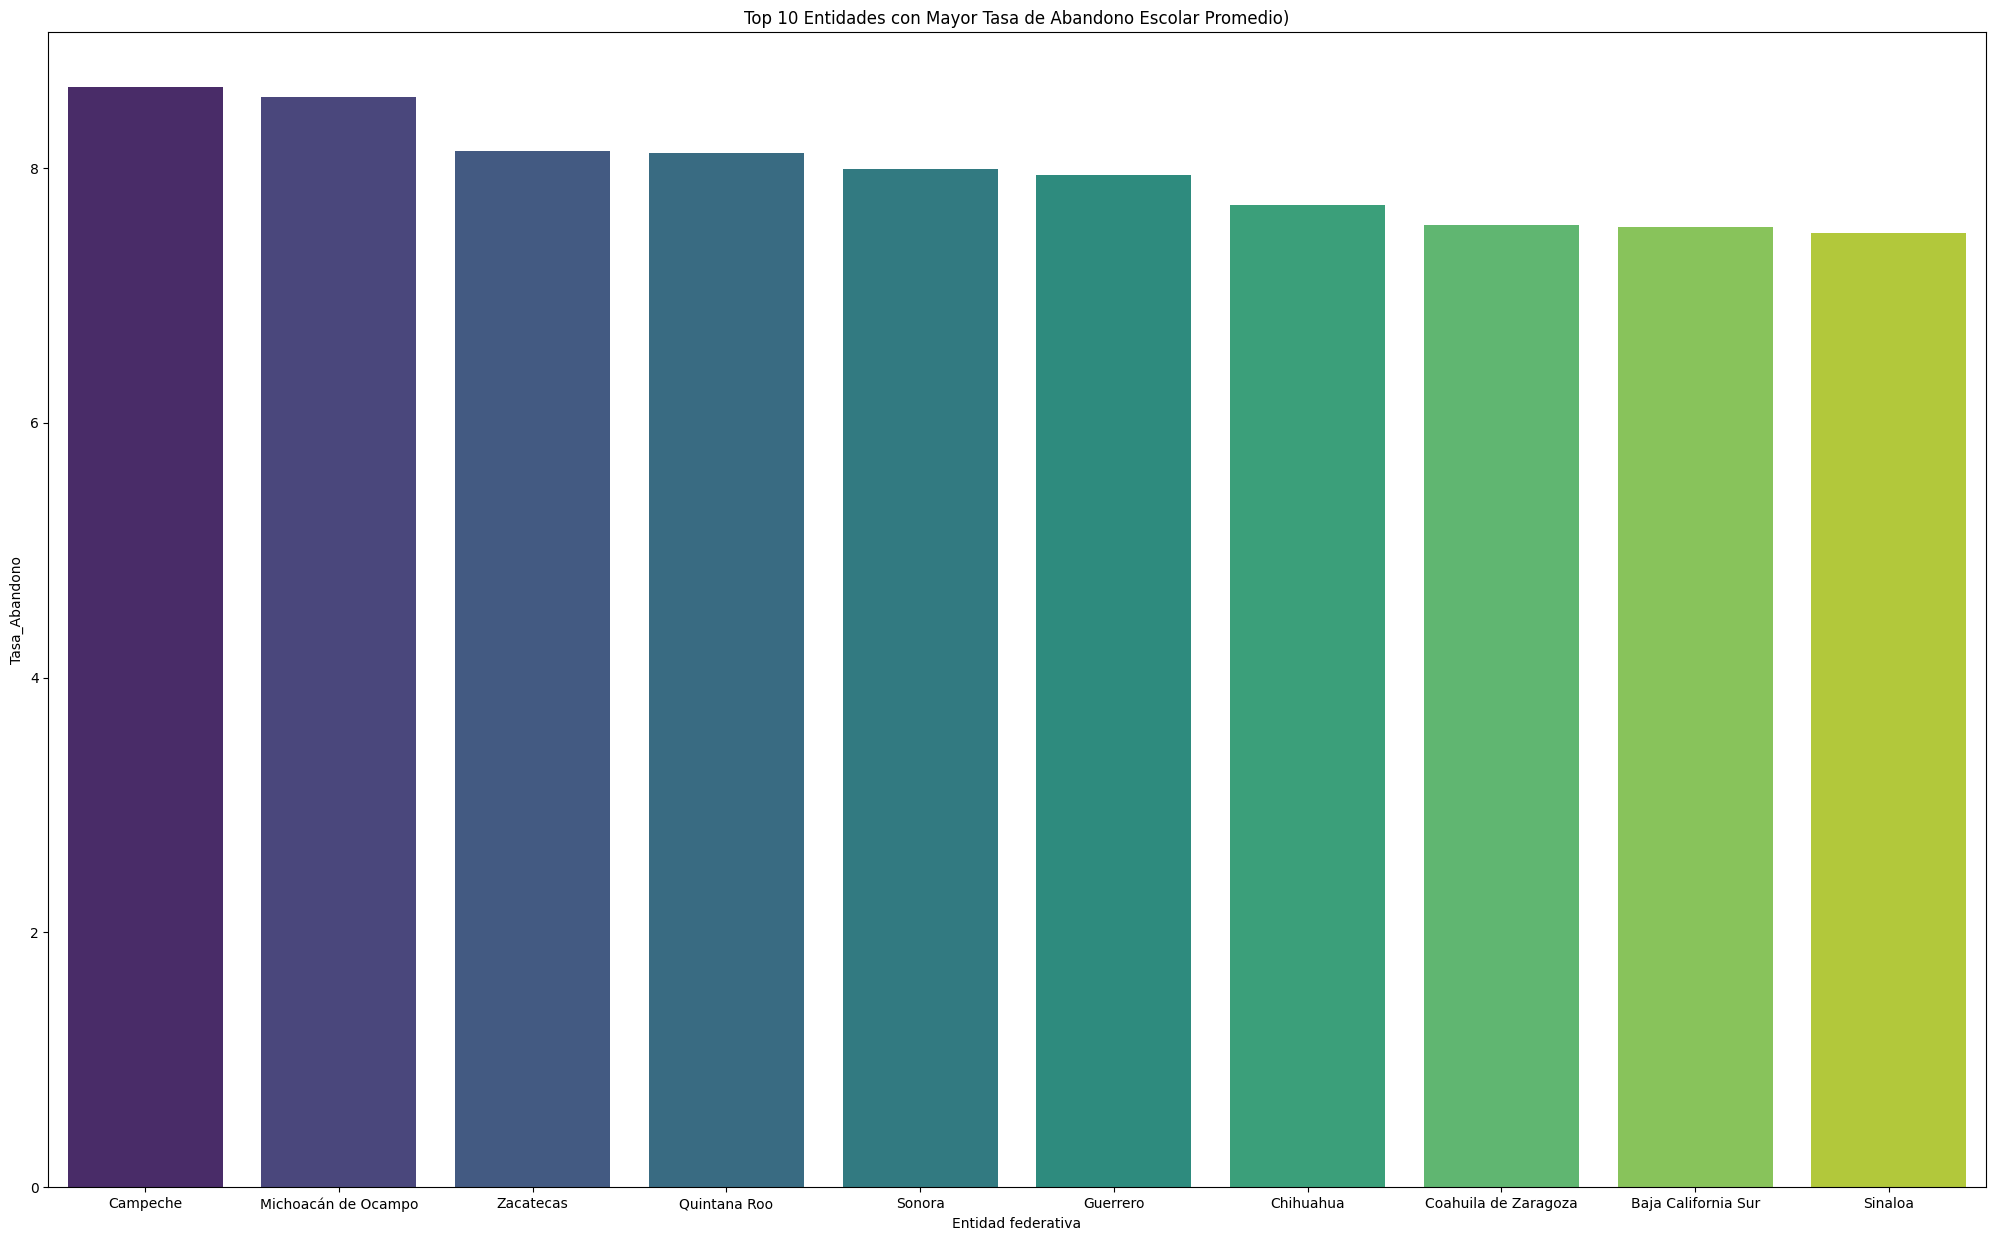

In [7]:
promedio_abandono = grouped.groupby('Entidad federativa')['Tasa_Abandono'].mean().reset_index()
top_10 = promedio_abandono.sort_values(by='Tasa_Abandono', ascending=False).head(10)
plt.figure(figsize=(25, 15))
sns.barplot(data=top_10, x='Entidad federativa', y='Tasa_Abandono', palette='viridis')
plt.title('Top 10 Entidades con Mayor Tasa de Abandono Escolar Promedio)')

In [12]:
df.head()
# Nos quedamos solo con el nivel superior 
df_superior =df[df['Nivel educativo'] == 'Superior'].copy() 
# Nos quedamos solo con los datos de 2024
df_superior_2024 = df_superior[['Entidad federativa','Nivel educativo','2023/2024']].copy()
df_superior_2024.rename(columns={'Entidad federativa': 'NOM_ENT', 'Nivel educativo': 'Nivel', '2023/2024': 'TASA_ABANDONO'}, inplace=True)

In [ ]:
df_superior_2024.drop(index = 3, inplace=True)  # Eliminar fila por índice

KeyError: '[3] not found in axis'

In [18]:
df_superior_2024.reset_index(drop=True, inplace=True)
df_superior_2024

,NOM_ENT,Nivel,TASA_ABANDONO
0,Aguascalientes,Superior,8.8
1,Baja California,Superior,5.1
2,Baja California Sur,Superior,13.6
3,Campeche,Superior,12.2
4,Coahuila de Zaragoza,Superior,6.4
5,Colima,Superior,11.0
6,Chiapas,Superior,4.3
7,Chihuahua,Superior,8.7
8,Ciudad de México,Superior,3.0
9,Durango,Superior,3.4


In [19]:
# Guardamos nuestro dataframe limpio a un nuevo archivo CSV
df_superior_2024.to_csv('abandono_escolar_nivel_superior_2024.csv', index=False)